# 8. Importing/export, basic plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We have seen in the previous chapter what structures are offered by Pandas and how to create them. Another very common way of "creating" a Pandas Dataframe is by importing a table from another format like CSV or Excel.

## 8.1 Simple import

An Excel table containing the same information as we had in [Chapter 1](01-Pandas_structures.ipynb) is provided in [composers.xlsx](composers.xlsx) and can be read with the ```read_excel``` function. There are many more readers for other types of data (csv, json, html etc.) but we focus here on Excel.

In [2]:
pd.read_excel('Data/composers.xlsx')

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


The reader automatically recognized the heaers of the file. However it created a new index. If needed we can specify which column to use as header:

In [3]:
pd.read_excel('Data/composers.xlsx', index_col = 'composer')

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


If we open the file in Excel, we see that it is composed of more than one sheet. Clearly, when not specifying anything, the reader only reads the first sheet. However we can specify a sheet:

In [4]:
specific_sheet = pd.read_excel('Data/composers.xlsx', index_col = 'composer',sheet_name='Sheet2')

In [5]:
specific_sheet

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg
Sibelius,10.0,unknown,unknown
Haydn,NaN,NaN,Röhrau


For each reader, there is a long list of options to specify how the file should be read. We can see all these options using the help (see below). Imagine that our tables contains a title and unnecessary rows: we can use the ```skiprows``` argument. Imagine you have dates in your table: you can use the ```date_parser``` argument to specify how to format them etc.

In [6]:
#use shift+tab within the parenthesis to see optional arguemnts
#pd.read_excel()

## 8.2 Handling unknown values

As you can see above, some information is missing. Some missing values are marked as "unknown" while other are NaN. NaN is the standard symbol for unknown/missing values and is understood by Pandas while "unknown" is just seen as text. This is impractical as now we have e.g. columns with a mix of numbers and text which will make later computations difficult. What we would like to do is to replace all "irrelevant" values with the standard NaN symbol that says "no information".

Let's first do a regular import:

In [7]:
import1 = pd.read_excel('Data/composers.xlsx', index_col = 'composer',sheet_name='Sheet2')
import1

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg
Sibelius,10.0,unknown,unknown
Haydn,NaN,NaN,Röhrau


If we look now at one column, we can see that columns have been imported in different ways. One column is an object, i.e. mixed types, the other contains floats:

In [8]:
import1.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Sibelius          10.0
Haydn              NaN
Name: birth, dtype: float64

In [9]:
import1.death

composer
Mahler             1911
Beethoven          1827
Puccini            1924
Shostakovich       1975
Sibelius        unknown
Haydn               NaN
Name: death, dtype: object

If we want to do calculations, for example getting summary information using ```describe()``` we have a problem: the ```death``` column is skipped because no calculation can be done with strings:

In [10]:
import1.describe()

,birth
count,5.000000
mean,1480.800000
std,823.674207
min,10.000000
25%,1770.000000
50%,1858.000000
75%,1860.000000
max,1906.000000


Now we specify that 'unknown' should be a NaN value:

In [11]:
import2 = pd.read_excel('Data/composers.xlsx', index_col = 'composer',
                        sheet_name='Sheet2', na_values=['unknown'])
import2

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,10.0,NaN,NaN
Haydn,NaN,NaN,Röhrau


And now computations are again possible, as Pandas knows how to deal with NaNs:

In [12]:
import2.describe()

,birth,death
count,5.000000,4.000000
mean,1480.800000,1909.250000
std,823.674207,61.396933
min,10.000000,1827.000000
25%,1770.000000,1890.000000
50%,1858.000000,1917.500000
75%,1860.000000,1936.750000
max,1906.000000,1975.000000


**Handling bad or missing values is a very important part of data science**. Taking care of the most common occurrences at import is a good solution.

## 8.3 Column types

We see above that the birth column has been "classified" as a float. However we know that this is not the case, it's just an integer. Here again, we can specify the column type already at import time using the dtype option and a dictionary:

In [13]:
import2 = pd.read_excel('Data/composers.xlsx', index_col = 'composer',sheet_name='Sheet1', na_values=['unknown'],
                       dtype={'composer':np.str,'birth':np.int32,'death':np.int32,'city':np.str})


In [14]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

## 8.4 Modifications after import

Of course we don't have to do all these adjustement at import time. We can also do a default import and check what has to be corrected afterward.

### 8.4.1 Create NaNs

If we missed some bad values at import we can just replace all those directly in the dataframe. We can achieve that by using the ```replace()``` method and specifying what should be replaced:

In [15]:
import1

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg
Sibelius,10.0,unknown,unknown
Haydn,NaN,NaN,Röhrau


In [16]:
import_nans = import1.replace('unknown', np.nan)
import_nans.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Sibelius          10.0
Haydn              NaN
Name: birth, dtype: float64

Note that when we fix "bad" values, e.g. here the "unknown" text value with NaNs, Pandas automatically adjust the type of the column, allowing us for exampel to later do mathemtical operations.

In [17]:
import1.death.dtype

dtype('O')

In [18]:
import_nans.death.dtype

dtype('float64')

### 8.4.2 Changing the type

We can also change the type of a column on an existing Dataframe with the same command as in Numpy:

In [19]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

In [20]:
import2.birth.astype('float')

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Name: birth, dtype: float64

If we look again at import2:

In [21]:
import2.birth

composer
Mahler          1860
Beethoven       1770
Puccini         1858
Shostakovich    1906
Name: birth, dtype: int32

we see that we didn't actually change the type. Changes on a Dataframe are only effective if we reassign the column: 

In [22]:
import2.birth = import2.birth.astype('float')

In [23]:
import2.birth

composer
Mahler          1860.0
Beethoven       1770.0
Puccini         1858.0
Shostakovich    1906.0
Name: birth, dtype: float64

## 8.5 Export

You can easily export a Dataframe that you worked on. Most commonly you will export it in a common format like CSV:

In [24]:
import2.to_csv('mydataframe.csv')

If you have a complex dataframe that e.g. contains lists, you can save it as a *pickle* object, a specific Python format that allows one to save complex data:

In [25]:
import2.to_pickle('Data/my_dataframe.pkl')

You can reload this type of data via the pickle loading function of Pandas:

In [26]:
import3 = pd.read_pickle('Data/my_dataframe.pkl')

In [27]:
import3

,birth,death,city
composer,,,
Mahler,1860.0,1911,Kaliste
Beethoven,1770.0,1827,Bonn
Puccini,1858.0,1924,Lucques
Shostakovich,1906.0,1975,Saint-Petersburg


## 8.6 Plotting

We will learn more about plotting later, but let's see here some possibilities offered by Pandas. Pandas builds on top of Matplotlib but exploits the knowledge included in Dataframes to improve the default output. Let's see with a simple dataset.

In [28]:
composers = pd.read_excel('Data/composers.xlsx', sheet_name='Sheet5')

We can pass Series to Matplotlib which manages to understand them. Here's a default scatter plot:

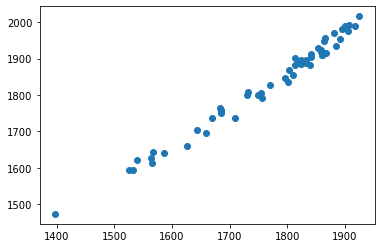

In [29]:
plt.plot(composers.birth, composers.death, 'o')
plt.show()

Now we look at the default Pandas output. Different types of plots are accessible when using the ```data_frame.plot``` function via the ```kind``` option. The variables to plot are column names passed as keywords instead of whole series like in Matplotlib:

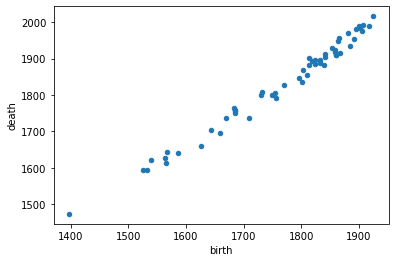

In [30]:
composers.plot(x = 'birth', y = 'death', kind = 'scatter')
plt.show()

We see that the plot automatically gets axis labels. Another gain is that some obvious options like setting a title are directly accesible when creating the plot:

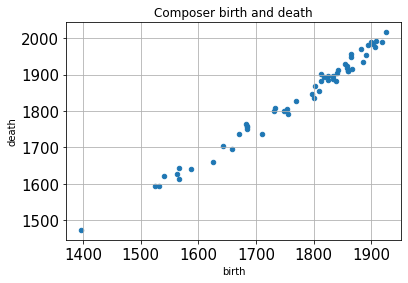

In [31]:
composers.plot(x = 'birth', y = 'death', kind = 'scatter',
               title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

One can add even more information on the plot by using more arguments used in a similar way as a grammar of graphics. For example we can color the scatter plot by periods:

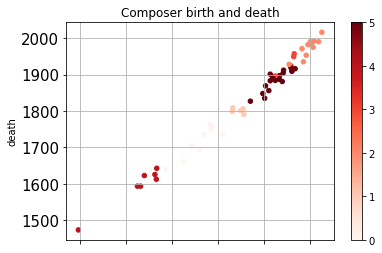

In [32]:
composers.plot(x = 'birth', y = 'death',kind = 'scatter',
               c = composers.period.astype('category').cat.codes, colormap = 'Reds', title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

Here you see already a limitation of the plotting library. To color dots by the peiod category, we had to turn the latter into a series of numbers. We could then rename those to improve the plot, but it's better to use more specialized packages such as Seaborn which allow to realize this kind of plot easily:

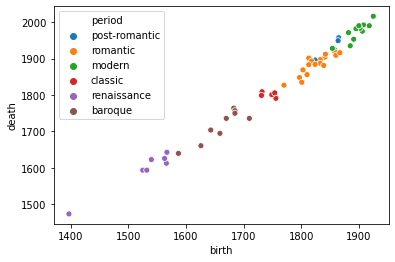

In [33]:
sns.scatterplot(data = composers, x = 'birth', y = 'death', hue = 'period')
plt.show()

Some additional plotting options are available in the ```plot()``` module. For example histograms:

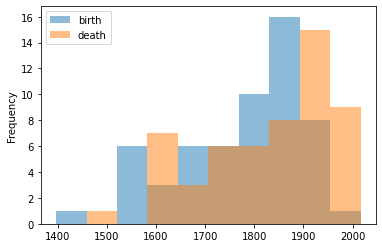

In [34]:
composers.plot.hist(alpha = 0.5)
plt.show()

Here you see again the gain from using Pandas: without specifying anything, Pandas made a histogram of the two columns containing numbers, labelled the axis and even added a legend to the plot.

All these features are very nice and very helpful when exploring a dataset. When anaylzing data in depth and creating complex plots, Pandas's plotting might however be limiting and other options such as Seaborn or Plotnine can be used.

Finally, all plots can be "styled" down to the smallest detail, either by using Matplotlib options or by directly applying a style e.g.:

In [35]:
plt.style.use('ggplot')

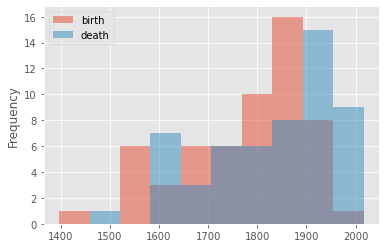

In [36]:
composers.plot.hist(alpha = 0.5)
plt.show()